In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
crime =pd.read_csv('11_Property_stolen_and_recovered_nature_of_property_2001_2010.csv')

In [31]:
crime.columns

Index(['AREA_NAME', 'YEAR', 'GROUP_NAME', 'SUB_GROUP_NAME',
       'CASES_PROPERTY_RECOVERED', 'CASES_PROPERTY_STOLEN',
       'VALUE_OF_PROPERTY_RECOVERED', 'VALUE_OF_PROPERTY_STOLEN'],
      dtype='object')

In [4]:
crime.isnull().sum()

Area_Name                      0
Year                           0
Group_Name                     0
Sub_Group_Name                 0
Cases_Property_Recovered       0
Cases_Property_Stolen          0
Value_of_Property_Recovered    0
Value_of_Property_Stolen       0
dtype: int64

In [5]:
crime.columns=crime.columns.str.strip()

In [6]:
crime.columns = crime.columns.str.upper()

In [7]:
crime['GROUP_NAME'].unique()

array(['Cattle - Property',
       'Communication and Electricity Wire - Property',
       'Cultural Property including Antiques - Property',
       'Cycle - Property', 'Electronic Components - Property',
       'Fire arms - Property',
       'Motor Vehicles - Motor car/Taxi/Jeep - Property',
       'Motor Vehicles - Others - Property', 'Motor Vehicles - Property',
       'Motor Vehicles -\tMotor Cycles/Scooters - Property',
       'Other Nature of Property', 'Total Property(Nature)'], dtype=object)

In [8]:
crime['SUB_GROUP_NAME'].unique()

array(['2. Cattle', '1. Communation and Electricity Wire',
       '8. Cultural Property including Antiques', '3. Cycle',
       '7. Electronic Components', '5. Fire Arms',
       '6. Explosives/Explosive Substances',
       '4.2 Motor Vehicles - Motor Car/Taxi/Jeep',
       '4.3 Motor Vehicles - Other Motor Vehicles', '4. Motor Vehicles',
       '4.1 Motor Vehicles - Motor Cycle/Scooters',
       '9. Other kinds of Property', 'Total Property Stolen & Recovered'],
      dtype=object)

In [9]:
property_summary =crime.groupby('SUB_GROUP_NAME',as_index=False)[['VALUE_OF_PROPERTY_RECOVERED', 'VALUE_OF_PROPERTY_STOLEN']].sum()

C:\Users\Pawan Kumar\AppData\Local\Temp\ipykernel_9412\526492655.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  property_summary =crime.groupby('SUB_GROUP_NAME',as_index=False)['VALUE_OF_PROPERTY_RECOVERED', 'VALUE_OF_PROPERTY_STOLEN'].sum()


In [10]:
property_summary['recovery rate(%)']=(property_summary['VALUE_OF_PROPERTY_RECOVERED']/property_summary['VALUE_OF_PROPERTY_STOLEN'])*100

In [65]:
SORTED_PROPERTY =property_summary.sort_values(by='recovery rate(%)',ascending =False)

In [67]:
fig_state=px.bar(SORTED_PROPERTY, y = 'SUB_GROUP_NAME',x='recovery rate(%)',title = 'category wise analysis of recovery rate(%)',orientation ='h',
                color ="recovery rate(%)",
                color_continuous_scale = 'viridis',
                labels={'recovery rate(%)':'recovery rate(%)','SUB_GROUP_NAME':'category'},
                hover_data={'recovery rate(%)':True,'SUB_GROUP_NAME':True}
                )
fig_state.update_layout(xaxis_title='recovery rate(%)',
                       yaxis_title ='CATEGORY',
                       yaxis = dict(autorange="reversed"),
                       height =600,
                       width =1000)
fig_state.show()

In [46]:
state_wise_analysis["recovery rate(%)"]=(state_wise_analysis['VALUE_OF_PROPERTY_RECOVERED']/state_wise_analysis['VALUE_OF_PROPERTY_STOLEN'])*100

In [54]:
sorted_state =state_wise_analysis.sort_values(by='recovery rate(%)',ascending =False)

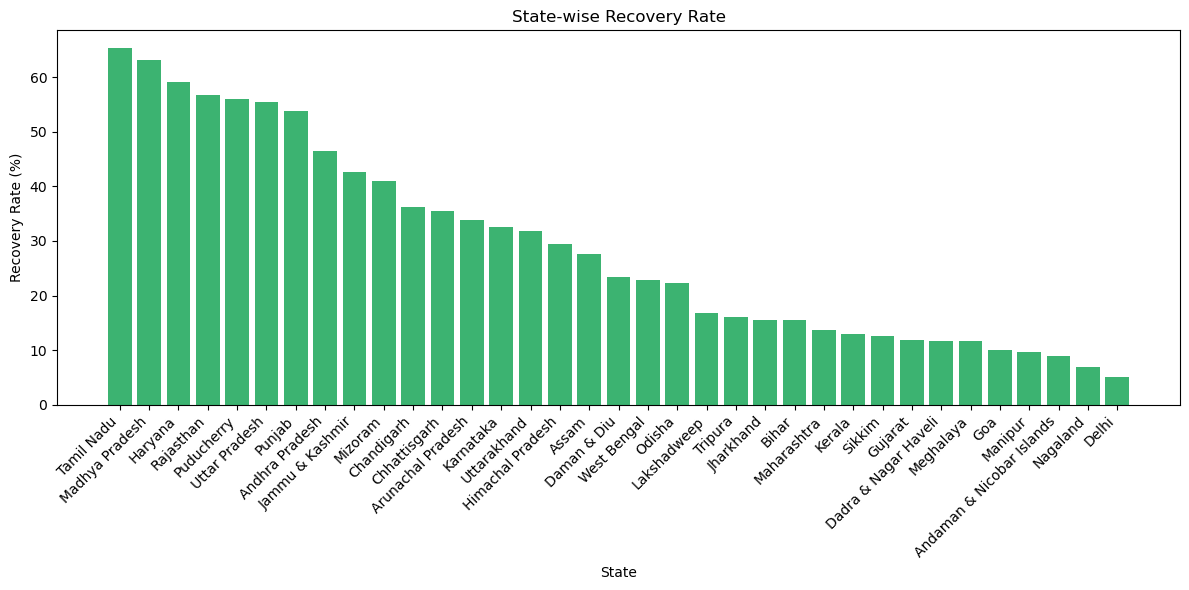

In [55]:
plt.figure(figsize=(12, 6))
plt.bar(sorted_state['AREA_NAME'], sorted_state['recovery rate(%)'], color='mediumseagreen')

plt.title("State-wise Recovery Rate")
plt.xlabel("State")
plt.ylabel("Recovery Rate (%)")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


In [63]:
fig_state=px.bar(sorted_state, y = 'AREA_NAME',x='recovery rate(%)',title = 'state wise analysis of recovery rate(%)',orientation ='h',
                color ="recovery rate(%)",
                color_continuous_scale = 'viridis',
                labels={'recovery rate(%)':'recovery rate(%)','AREA_NAME':'STATE/UT'},
                hover_data={'recovery rate(%)':True,'AREA_NAME':True}
                )
fig_state.update_layout(xaxis_title='recovery rate(%)',
                       yaxis_title ='STATE',
                       yaxis = dict(autorange="reversed"),
                       height =600,
                       width =600)
fig_state.show()

In [47]:
year_wise_analysis["recovery rate(%)"]=(year_wise_analysis['VALUE_OF_PROPERTY_RECOVERED']/year_wise_analysis['VALUE_OF_PROPERTY_STOLEN'])*100

In [60]:
fig_year=px.bar(year_wise_analysis, y = 'YEAR',x='recovery rate(%)',title = 'year wise analysis of recovery rate(%)',orientation ='h',
                color ="recovery rate(%)",
                color_continuous_scale = 'viridis',
                labels={'recovery rate(%)':'recovery rate(%)','YEAR':'YEAR'},
                hover_data={'recovery rate(%)':True,'YEAR':True}
                )
fig_year.update_layout(xaxis_title='recovery rate(%)',
                       yaxis_title ='YEAR',
                       yaxis = dict(autorange="reversed"),
                       height =600,
                       width =700)
fig_year.show()

In [11]:
property_summary_sorted =property_summary.sort_values(by='VALUE_OF_PROPERTY_STOLEN',ascending=False)

In [19]:
fig = go.Figure()
fig.add_trace(go.Bar(x=property_summary_sorted['SUB_GROUP_NAME'],
                    y =property_summary_sorted['VALUE_OF_PROPERTY_STOLEN'],
                    name ='value stolen',
                    marker_color = 'indianred'))
fig.add_trace(go.Bar(x=property_summary_sorted['SUB_GROUP_NAME'],
                    y =property_summary_sorted['VALUE_OF_PROPERTY_RECOVERED'],
                    name ='value recovered',
                    marker_color = 'seagreen'))
fig.update_layout(title='Property Types by Value Stolen vs. Recovered (2001–2010)',
                 xaxis_title='property type',
                 yaxis_title='value(in rupee)',
                 barmode = 'group',
                 yaxis_type='log',
                 height =1000,
                 width =1000)
fig.show()

In [21]:
year_wise_analysis = crime.groupby('YEAR',as_index=False)[['VALUE_OF_PROPERTY_RECOVERED', 'VALUE_OF_PROPERTY_STOLEN']].sum().sort_values(by='VALUE_OF_PROPERTY_STOLEN',ascending=False)

In [22]:
year_wise_analysis

,YEAR,VALUE_OF_PROPERTY_RECOVERED,VALUE_OF_PROPERTY_STOLEN
9,2010,41063947820,139146268019
8,2009,22252080039,103894500068
7,2008,19048755878,88075221524
6,2007,17522610490,63851367823
5,2006,15443462844,57616328463
4,2005,14232906880,56004639503
1,2002,12087551884,55744346396
3,2004,11839755230,54609644110
2,2003,11377015493,41410106315
0,2001,11313082128,36372685774


In [27]:
fig = go.Figure()
fig.add_trace(go.Bar(y=year_wise_analysis['VALUE_OF_PROPERTY_STOLEN'],
                    x=year_wise_analysis['YEAR'],
                    name = 'value stolen',
                    marker_color ='indianred'))
fig.add_trace(go.Bar(y=year_wise_analysis['VALUE_OF_PROPERTY_RECOVERED'],
                    x=year_wise_analysis['YEAR'],
                    name = 'value recovered',
                    marker_color ='seagreen'))
fig.update_layout(title="year wise analysis of property stolen  vas recovered",
                  xaxis_title="`Year",
                  yaxis_title="value in rupee",
                  yaxis_type ="log",
                  barmode='group',
                  height =600,
                  width =1000)
fig.show()

In [32]:
state_wise_analysis =crime.groupby('AREA_NAME',as_index=False)[['VALUE_OF_PROPERTY_RECOVERED', 'VALUE_OF_PROPERTY_STOLEN']].sum().sort_values(by='VALUE_OF_PROPERTY_STOLEN',ascending =False)

In [42]:
fig = go.Figure()
fig.add_trace(go.Bar(x=state_wise_analysis['AREA_NAME'],
                    y=state_wise_analysis['VALUE_OF_PROPERTY_STOLEN'],
                    name="value stolen",
                    marker_color="indianred"))
fig.add_trace(go.Bar(x=state_wise_analysis['AREA_NAME'],
                    y=state_wise_analysis['VALUE_OF_PROPERTY_RECOVERED'],
                    name="value recovered",
                    marker_color="seagreen"))
fig.update_layout(title ="state wise analysis of stolen vs recovered property",
                 xaxis_title ="state",
                 yaxis_title ="value in rupee",
                 yaxis_type ="log",
                  barmode="group",
                 height =800,
                 width =1200)
fig.show()

In [37]:
state_wise_analysis

,AREA_NAME,VALUE_OF_PROPERTY_RECOVERED,VALUE_OF_PROPERTY_STOLEN
20,Maharashtra,29543342881,217063089987
9,Delhi,3822400256,74497210284
11,Gujarat,8409192128,71285745744
19,Madhya Pradesh,22427531681,35554532139
16,Karnataka,11079496779,33945698679
17,Kerala,4023466295,30857528237
32,Uttar Pradesh,16116759792,29094427241
28,Rajasthan,14614007333,25739605450
34,West Bengal,5822200089,25543386953
1,Andhra Pradesh,10042202784,21583696194


In [72]:
cases_state =crime.groupby('AREA_NAME', as_index=False)[['CASES_PROPERTY_STOLEN','CASES_PROPERTY_RECOVERED']].sum().sort_values(by='CASES_PROPERTY_STOLEN',ascending =False)

In [79]:
cases_year =crime.groupby('YEAR',as_index=False)[['CASES_PROPERTY_STOLEN','CASES_PROPERTY_RECOVERED']].sum().sort_values(by='CASES_PROPERTY_STOLEN',ascending =False)

In [74]:
fig = go.Figure()
fig.add_trace(go.Bar(x=cases_state['AREA_NAME'],
                    y=cases_state['CASES_PROPERTY_STOLEN'],
                    name="stolen cases",
                    marker_color="indianred"))
fig.add_trace(go.Bar(x=cases_state['AREA_NAME'],
                    y=cases_state['CASES_PROPERTY_RECOVERED'],
                    name="recovered cases",
                    marker_color="seagreen"))
fig.update_layout(title ="state wise analysis of stolen vs recovered property cases",
                 xaxis_title ="state",
                 yaxis_title ="no. of cases",
                 yaxis_type ="log",
                  barmode="group",
                 height =600,
                 width =1000)
fig.show()

In [80]:
fig = go.Figure()
fig.add_trace(go.Bar(x=cases_year['YEAR'],
                    y=cases_year['CASES_PROPERTY_STOLEN'],
                    name="stolen cases",
                    marker_color="indianred"))
fig.add_trace(go.Bar(x=cases_year['YEAR'],
                    y=cases_year['CASES_PROPERTY_RECOVERED'],
                    name="recovered cases",
                    marker_color="seagreen"))
fig.update_layout(title ="year wise analysis of stolen vs recovered property cases",
                 xaxis_title ="year",
                 yaxis_title ="no. of cases",
                 yaxis_type ="log",
                  barmode="group",
                 height =600,
                 width =1000)
fig.show()